# Exploratory Data Analysis 

In [1]:
import polars as pl

import plotly.express as px
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
# Path needs to be added manually to read from another folder
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)

import visualization

In [2]:
df = pl.read_csv("..\data\cleaned_df.csv")
print("Shape : ", df.shape)
df.head(5)

Shape :  (1695, 13)


,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification,target
i64,str,f64,f64,f64,i64,str,f64,f64,f64,str,str,i64
0,"""1f2c32d8-2d6e-…",0.000812,0.004066,85.643243,5405,"""default""",1460.0,1295.0,451.0,"""E""","""normal""",0
1,"""4c486414-d4f5-…",0.000063,0.002211,16.166805,519,"""default""",9299.0,8447.0,302.0,"""E""","""normal""",0
2,"""7e5838fc-bce1-…",0.004481,0.015324,99.573276,6211,"""default""",255.0,232.0,354.0,"""E""","""normal""",0
3,"""82661ecd-d87f-…",0.017837,0.014974,69.792793,8292,"""default""",195.0,111.0,116.0,"""E""","""normal""",0
4,"""d62d56ea-775e-…",0.000797,0.006056,14.952756,182,"""default""",272.0,254.0,23.0,"""E""","""normal""",0


In [3]:
visualization.bar_plot(df,"target","Counts of Target Classes")

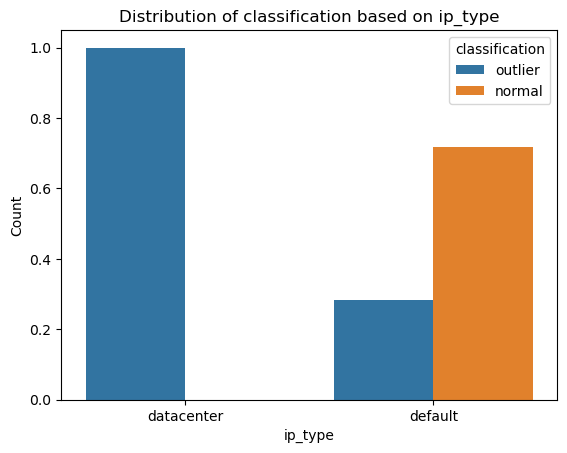

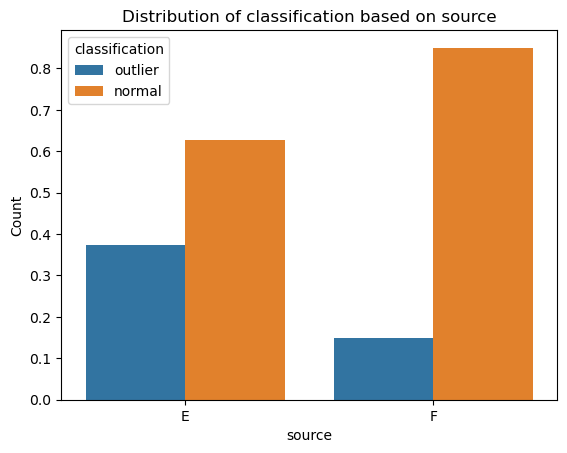

In [4]:
categorical_cols=["ip_type","source"]
for col in categorical_cols:
    visualization.plt_proportion_plot(
        df,
        col,
        "classification"
    )


**Observation**
* Every API call from datacenter is an outlier
* source is more fairly distributed

**Impact** 

* Every API call from ip_type : datacenter can be dropped.


,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,target
inter_api_access_duration(sec),1.000000,0.072424,-0.003418,0.149669,-0.033008,-0.029199,-0.047715,0.094405
api_access_uniqueness,0.072424,1.000000,-0.080800,-0.006048,-0.275642,-0.247108,-0.392042,0.767884
sequence_length(count),-0.003418,-0.080800,1.000000,0.142744,-0.084133,-0.080589,0.018244,0.249645
vsession_duration(min),0.149669,-0.006048,0.142744,1.000000,-0.043159,-0.035166,-0.013865,0.114413
num_sessions,-0.033008,-0.275642,-0.084133,-0.043159,1.000000,0.929199,0.525890,-0.343982
num_users,-0.029199,-0.247108,-0.080589,-0.035166,0.929199,1.000000,0.541066,-0.308356
num_unique_apis,-0.047715,-0.392042,0.018244,-0.013865,0.525890,0.541066,1.000000,-0.450704
target,0.094405,0.767884,0.249645,0.114413,-0.343982,-0.308356,-0.450704,1.000000


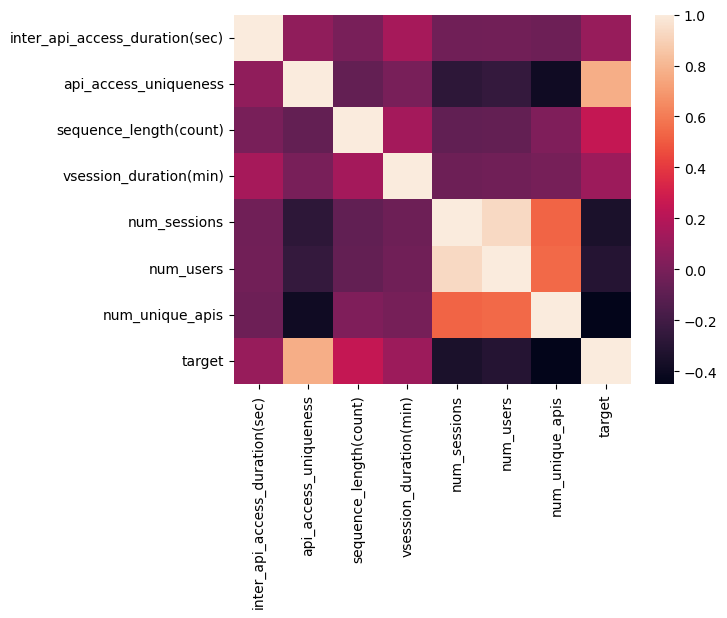

In [5]:
numerical_cols = [
    "inter_api_access_duration(sec)",
    "api_access_uniqueness",
    "sequence_length(count)",
    "vsession_duration(min)",
    "num_sessions",
    "num_users",
    "num_unique_apis",
    ]
sns.heatmap(df[numerical_cols+["target"]].to_pandas().corr())
df[numerical_cols+["target"]].to_pandas().corr()

**Observation**
* High correlatin between :
    * target and api_access_uniqueness
    * num_users and num_sessions
* Medium correlatin between :
    *  num_users - num_unique_apis
    *  num_sessions - num_unique_apis

**Impact** 

* make sure to test them during feature engineering

In [30]:
visualization.boxplot_by_bin_with_target(
    data = df,
    column_to_bin = "sequence_length(count)",
    numeric_column = "inter_api_access_duration(sec)",
    target = "classification"
)